In [1]:
%pylab inline
import glob
import json
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics.pairwise import pairwise_distances
from vectorizer import Vectorizer
from downloader import *

folder='model'
#get_news(folder=folder)



Populating the interactive namespace from numpy and matplotlib


In [2]:
# get news texts
news = json.load(open(glob.glob(folder+'/news*.json')[-1]))
data,articles = [],[]
for source in news.keys():
        for title,article in news[source].items():
            data.append(article['text'])
            predictions = [prediction['probability'] for prediction in article['prediction']]
            articles.append(
            {   'source':source,\
                'title':title,\
                'url':article['url'],\
                'prediction':article['prediction'],\
                'predictedLabel':article['prediction'][argmax(predictions)]['party']})


In [100]:
# switched again to unigram Bow - better interpretability for finding out what's going wrong with the distances
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# worked a bit on more stopwords - mainly filtering out html related noise
stops = map(lambda x:x.lower().strip(),open('stopwords.txt').readlines()[6:])
print stops[:10]

# using now stopwords and filtering out digits
bow = TfidfVectorizer(min_df=2,stop_words=stops)

X = bow.fit_transform(data)
Xdense = array(X.todense())

# creating bow-index-to-word map
idx2word = dict(zip(bow.vocabulary_.values(),bow.vocabulary_.keys()))
nneighbors = 5

['medienbericht', 'tag', 'k\xc3\xb6nnen', 'pers\xc3\xb6nliche', 'empf\xc3\xa4nger', 'umweltsch\xc3\xbctzer', 'beobachtet', 'lehren', 'k\xc3\xb6nnte', 'hergereicht']


******************
Britische EU-Wünsche:: Schulz kommt Cameron entgegen
http://www.faz.net/aktuell/politik/europaeische-union/britische-eu-wuensche-schulz-kommt-cameron-entgegen-13620561.html
Topwords:eu premierminister großbritannien cameron schulz
	EU-Verträge: Cameron mit Änderungswünschen allein 11.286038
	 URL: http://www.faz.net/aktuell/politik/europaeische-union/eu-vertraege-cameron-mit-aenderungswuenschen-allein-13620607.html
	Topwords:reform eu großbritannien cameron verträge
	******************
	Cameron in Berlin: Britischer Premierminister wirbt für EU-Reformen 11.728301
	 URL: http://www.welt.de/videos/article141673986/Britischer-Premierminister-wirbt-fuer-EU-Reformen.html
	Topwords:wirbt warb reformieren ideen premierminister
	******************
	Greser & Lenz: Gesammelte Werke 11.813803
	 URL: http://www.faz.net/aktuell/feuilleton/cartoons/greser-lenz-witze-fuer-deutschland-1294625.html
	Topwords:groß täglich komische aufgestiegen lenz
	******************
	Umweltsünde: Be

<matplotlib.colorbar.Colorbar instance at 0x10a3e9560>

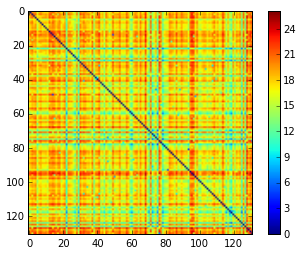

In [16]:
K = pairwise_distances(Xdense,metric='l1',n_jobs=-1)

nneighbors = 5
for urlidx in range(K.shape[0]):
    idx =  (K[urlidx,:]).argsort()[1:nneighbors+1]

    print "******************"
    print articles[urlidx]['title'] + "\n"  + articles[urlidx]['url'] 
    print 'Topwords:'+' '.join([idx2word[wi] for wi in Xdense[urlidx,:].argsort()[-nneighbors:]])
    for iidx in idx:
        print '\t'+articles[iidx]['title'] + ' %f'%K[urlidx][iidx] + '\n\t URL: ' +articles[iidx]['url'] 
        print '\tTopwords:'+' '.join([idx2word[wi] for wi in Xdense[iidx,:].argsort()[-nneighbors:]])
        print "\t******************"


imshow(K)
colorbar()


******************
Britische EU-Wünsche:: Schulz kommt Cameron entgegen
http://www.faz.net/aktuell/politik/europaeische-union/britische-eu-wuensche-schulz-kommt-cameron-entgegen-13620561.html
Topwords:eu premierminister großbritannien cameron schulz
	EU-Verträge: Cameron mit Änderungswünschen allein 0.941243
	 URL: http://www.faz.net/aktuell/politik/europaeische-union/eu-vertraege-cameron-mit-aenderungswuenschen-allein-13620607.html
	Topwords:reform eu großbritannien cameron verträge
	******************
	Cameron steht allein auf weiter Flur 0.946626
	 URL: http://www.welt.de/politik/ausland/article141698701/Cameron-steht-allein-auf-weiter-Flur.html
	Topwords:briten schulz cameron verträge eu
	******************
	Änderung der EU-Verträge: Merkel lässt Cameron zappeln 1.135715
	 URL: http://www.sueddeutsche.de/politik/aenderung-der-eu-vertraege-merkel-laesst-cameron-zappeln-1.2498865
	Topwords:2499875 2495401 eu merkel cameron
	******************
	Merkel schließt Änderung der EU-Verträge

<matplotlib.colorbar.Colorbar instance at 0x10a5bb9e0>

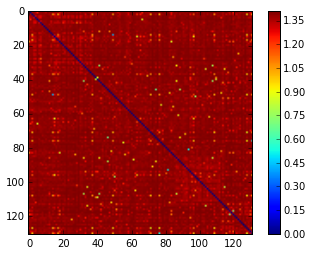

In [17]:
K = pairwise_distances(X,metric='l2',n_jobs=-1)

nneighbors = 5
for urlidx in range(K.shape[0]):
    idx =  (K[urlidx,:]).argsort()[1:nneighbors+1]

    print "******************"
    print articles[urlidx]['title'] + "\n"  + articles[urlidx]['url'] 
    print 'Topwords:'+' '.join([idx2word[wi] for wi in Xdense[urlidx,:].argsort()[-nneighbors:]])
    for iidx in idx:
        print '\t'+articles[iidx]['title'] + ' %f'%K[urlidx][iidx] + '\n\t URL: ' +articles[iidx]['url'] 
        print '\tTopwords:'+' '.join([idx2word[wi] for wi in Xdense[iidx,:].argsort()[-nneighbors:]])
        print "\t******************"


imshow(K)
colorbar()


Cluster 0
Topwords:verfolgen bundestags opposition diensten news laufenden kostenlosen hilfelassen barack untersuchungsausschuss mutmaßliche erklärungen regierung dokumente ermittlungsverfahren ziele geheimdienst annäherung affäre bundesregierung tatsächlich untersuchung liste senator ermittler obama usa bnd nsa us
	Spionage: Belgien ordnet Untersuchung gegen BND an
	 URL: http://www.zeit.de/politik/ausland/2015-05/bnd-spionage-untersuchung-belgien
	Bundesanwalt prüft Ramsteins Rolle beim US-Drohnenkrieg
	 URL: http://www.spiegel.de/politik/deutschland/bundesanwalt-prueft-ramsteins-rolle-beim-us-drohnenkrieg-a-1036187.html
	NSA-Reform: US-Metadatensammlung im Senat vor Aus
	 URL: http://www.spiegel.de/politik/ausland/nsa-reform-us-metadatensammlung-im-senat-vor-aus-a-1036332.html
	USA streichen Kuba von der Terrorliste
	 URL: http://www.spiegel.de/politik/ausland/usa-streichen-kuba-von-der-terrorliste-a-1036299.html
	BND: Sonderermittler auch gegen den Willen der Opposition
	 URL: http

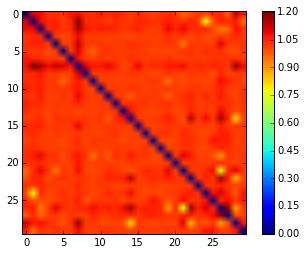

In [77]:
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
from scipy.stats.mstats import zscore
nclusters = 30
Xc = zscore(KernelPCA(n_components=nclusters,kernel='rbf',gamma=.8).fit_transform(X))
#Xc = KernelPCA(n_components=nclusters,kernel='rbf',gamma=1.).fit_transform(X)
km = KMeans(n_clusters=nclusters).fit(Xc)
Xc = km.predict(Xc)
km.cluster_centers_
hh = histogram(Xc,nclusters)
#bar(hh[1][:-1],hh[0])

imshow(pairwise_distances(km.cluster_centers_,metric='cosine',n_jobs=-1))
colorbar()
for cl in range(nclusters):
    print 'Cluster %d'%cl
    members = (Xc==cl).nonzero()[0][:nneighbors]
    topwords = array(X[members,:].mean(axis=0))[0].argsort()[-nclusters:]
    print 'Topwords:'+' '.join([idx2word[wi] for wi in topwords])
    for nn in members:
        print '\t'+articles[nn]['title'] + '\n\t URL: ' +articles[nn]['url']

1.37896526942
Cluster 0 2 members
Topwords:pegida teilnehmer dresden bewegung für wut locke demonstranten autoren sorgen
	Neue Studie über Pegida-Anhänger
	 URL: http://www.faz.net/aktuell/politik/inland/neue-studie-ueber-pegida-anhaenger-13605345.html
	Pegida: Unermüdlich und besessen
	 URL: http://www.sueddeutsche.de/politik/pegida-unermuedlich-und-besessen-1.2492756
Cluster 1 5 members
Topwords:merkel gipfel usa verhandlungen kanzlerin ttip interview bundeskanzlerin özdemir elmau
	Freihandelsabkommen: Merkel will mehr Tempo bei TTIP-Verhandlungen
	 URL: http://www.zeit.de/politik/deutschland/2015-05/ttip-merkel-obama-freihandel-abkommen
	NSA-Skandal: Merkel weist Vorwurf der Lüge zurück
	 URL: http://www.zeit.de/politik/2015-05/merkel-usa-no-spy
	Interview mit Angela Merkel - Der Gipfel der Harmonie
	 URL: http://www.sueddeutsche.de/politik/angelamerkel-im-interview-gipfel-der-harmonie-1.2500311
	Özdemir: Kanzlerin durch BND-Affäre belastet
	 URL: http://www.sueddeutsche.de/politik/

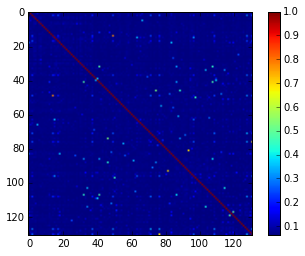

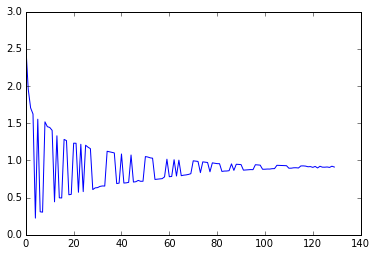

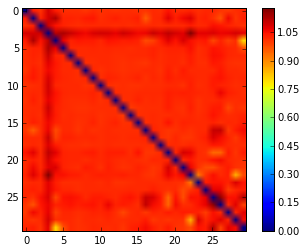

In [106]:
from sklearn.decomposition import KernelPCA
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans
from scipy.stats.mstats import zscore
perc = 100./len(news)
width = percentile(pairwise_distances(X,metric='l2').flatten(),perc)
print width
nclusters = 30
K = rbf_kernel(X,gamma=width)
imshow(K)
colorbar()

eigvals,eigvecs = eig(K)
figure()
plot(eigvals[1:])
Xc = zscore(KernelPCA(n_components=nclusters,kernel='rbf',gamma=width).fit_transform(X))
#Xc = KernelPCA(n_components=nclusters,kernel='rbf',gamma=1.).fit_transform(X)
km = KMeans(n_clusters=nclusters).fit(Xc)
Xc = km.predict(Xc)
km.cluster_centers_
hh = histogram(Xc,nclusters)
#bar(hh[1][:-1],hh[0])

figure()
imshow(pairwise_distances(km.cluster_centers_,metric='cosine',n_jobs=-1))
colorbar()
for cl in range(nclusters):
    nmembers = (Xc==cl).sum()
    if nmembers < len(news)*2.0:
        print 'Cluster %d'%cl + ' %d members'%nmembers
        members = (Xc==cl).nonzero()[0][:nneighbors]
        topwords = array(X[members,:].sum(axis=0))[0].argsort()[-10:][-10:][::-1]
        print 'Topwords:'+' '.join([idx2word[wi] for wi in topwords])
        for nn in members:
            print '\t'+articles[nn]['title'] + '\n\t URL: ' +articles[nn]['url']